In [11]:
# -*- coding: utf-8 -*-
"""
Created on Wed May  7 11:38:36 2025

@author: Frej
"""

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.integrate as integrate


    
# Single int method???
class M:
    def __init__(self,Nc,eps,phi,wl,I,E0,res):
        self.T = Nc*2*np.pi/wl
        self.A0 = np.sqrt(I)/wl
        
        self.eps = eps
        self.wl = wl
        self.phi = phi
        self.E0 = E0
        
        #Fields and times
        self.ts = np.linspace(0,self.T,num=res)
        vector = np.asarray([self.ts*0,self.eps*np.sin(self.wl*self.ts+self.phi),np.cos(self.wl*self.ts+self.phi)])
        self.As = np.sin(np.pi*self.ts/self.T)**2*self.A0/((1+self.eps**2)**(1/2))*vector

    
    #Defining Exponential
    def exp_integrand(self,k):
        return [1j * (1/2) * ((k+A) @ (k+A)) for A in self.As.T]   
    def exp_integral(self,k):
        exp_ys = self.exp_integrand(k)
        return np.e**(integrate.cumulative_trapezoid(exp_ys,self.ts,initial=0)-1j * self.E0*self.ts)
    #Defining Integral
    def integrands(self,k):
        return self.As * self.exp_integral(k)
    def integral(self,k):
        ys = self.integrands(k)
        return k @ integrate.cumulative_trapezoid(ys,self.ts,initial=0)
    
    #Defining multiplication with fourier transform
    def f_phi_0(self,k):
        k_mag = np.linalg.norm(k)
        return 2*2**(1/2)/np.pi*(1/(k_mag**2+1)**2)
    def Mk0(self,k):
        return 1j*self.f_phi_0(k)*self.integral(k)
    def Mk0_squared(self,k):
        return np.real(np.vdot(self.Mk0(k),self.Mk0(k)))

# %%

# %%

#%%

In [12]:

#Field parameters
Nc = 3 #Field revolutions in envelope
eps = 1 #(-1,0,1), Polarization of light
phi = 0 #np.pi #Phase difference between envelope and field
#all values in au
wl = 0.057 #800nm wavelength
I = 0.003 #I=10^14 w/cm^2  
E0 = -0.500 #13.6 eV
res = 1000

M1 = M(Nc,eps,phi,wl,I,E0,res)
U_p = np.vdot(M1.As,M1.As)/4
print(U_p)

43.23926592797784


Text(0.5, 1.0, 'Circularly Polarized Field ($\\epsilon=$1, $N_c=$3)')

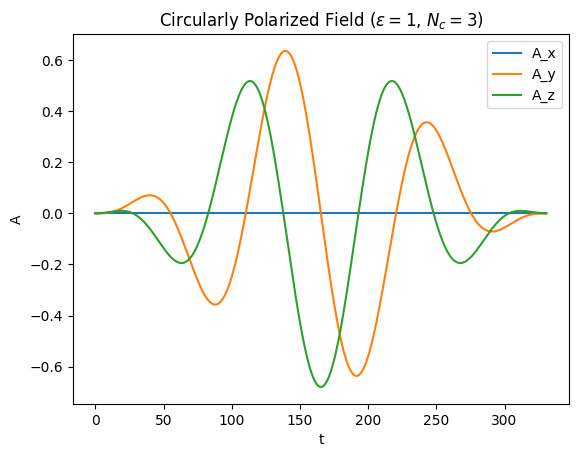

In [13]:
fig, ax = plt.subplots()
ax.plot(M1.ts,M1.As[0,:],label="A_x")
ax.plot(M1.ts,M1.As[1,:],label="A_y")
ax.plot(M1.ts,M1.As[2,:],label="A_z")
ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("A")
ax.set_title(r"Circularly Polarized Field ($\epsilon=$" + f"{eps}" + r", $N_c=$" + f"{Nc})")

4


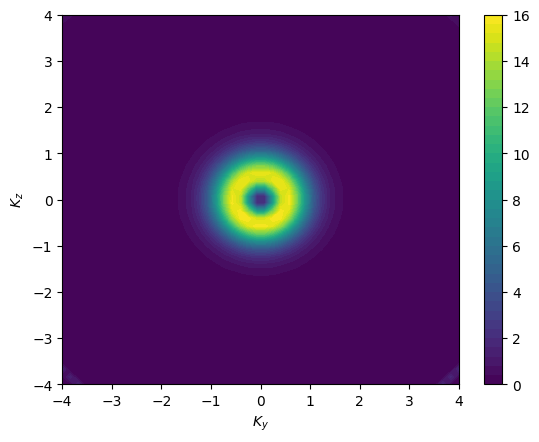

In [14]:

#Trial calculation for k along the z-axis

# k_range = np.sqrt(np.abs(2* Nc * wl - 2*U_p))
k_range = 4
print(k_range)
#kxs = np.linspace(-2,2,num=50)
kys = np.linspace(-k_range,k_range,num=50)
kzs = np.linspace(-k_range,k_range,num=50)

a = np.empty(shape=(len(kys),len(kzs)))
for j in range(0,len(kys)):
    for k in range(0,len(kzs)):
        a[k][j]=M1.Mk0_squared([0,kys[j],kzs[k]])

# Simple plot
plt.contourf(kys, kzs, a,50)
plt.xlabel(r'$K_y$')
plt.ylabel(r'$K_z$')
plt.colorbar()

In [15]:
Mkz_squared = np.array([M1.Mk0_squared([0, 0, kz]) for kz in kzs])


(0.0, 4.0)

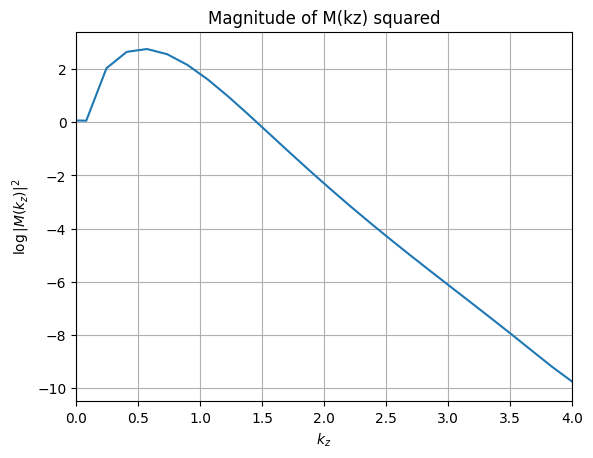

In [16]:
fig, ax = plt.subplots()
ax.plot(kzs, np.log(Mkz_squared))
ax.set_xlabel(r'$k_z$')
ax.set_ylabel(r'$\log{|M(k_z)|^2}$')
ax.set_title('Magnitude of M(kz) squared')
ax.grid()
ax.set_xlim(0,k_range)